In [1]:
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import fmax as fm
import numpy as np

# Some plotting functions

In [2]:
def plot_posterior_predictive(fcast_model, label, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.posterior_predictive_samples
    index = fcast_model.train_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.01, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.1, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.9, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.99, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)

    t_index = [1968+i for i in range(len(index))]

    axs.fill_between(t_index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    axs.fill_between(t_index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    axs.plot(t_index, medians, label="Median")
    axs.plot(t_index, fcast_model.train_data, color="red", label="Training")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [3]:
def plot_forecast(fcast_model, label, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
        
    # axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    # axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    
    axs.plot(index, medians, label="Median")
    axs.plot(fcast_model.train_index, fcast_model.train_data, color="red", label="Training")
    #axs.plot(fcast_model.fcast_index, test_data, color="black", label="Tryfos")
    #axs.plot(fcast_model.fcast_index, actual, color="green", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [4]:
def plot_forecast_fin(fcast_model, label, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    #axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    #axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [5]:
def plot_forecast_fin_w_mean(fcast_model, test_data, label, actual, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)
    mean = np.mean(sample_paths, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot(index, mean, label="Mean", color="purple")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [6]:
def plot_forecast_small(fcast_model, label):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(8,5))
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    #axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    #axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    #axs.set_xlabel("Period")
    #axs.set_ylabel("Record")
    #axs.set_title(label)

    fig.tight_layout()

    return fig

# Results for Gaussian

In [8]:
#whiches = ["1000m", "1m", "5000m", "Marathon", "10000m", "20000m"]
#whiches = ['20000m']
whiches = ["1000m", "1m", "5000m", "Marathon", "10000m"]
#whiches = ["1000m", "1m", "5000m", "Marathon"]
#whiches = ["1000m"]
#whiches = ["1000m"]
#whiches = ['1m']
#whiches = ['Marathon']

mses = {}
avg_log_probs = {}

s5_quantiles = {}
s15_quantiles = {}
s50_quantiles = {}
s85_quantiles = {}
s95_quantiles = {}
means = {}


fails = []

for which in whiches:
  try:
    # df = pd.read_csv("tryfos_data.csv")
    # years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

    # actual_df = pd.read_csv("tryfos_actual.csv")
    # _, actual_records = actual_df["Year"].values, actual_df[which].values

    df = pd.read_csv('tryfos_until_present.csv')
    years, records = df["Year"].values, df[which].values

    training_years = years
    training_records = records
    # tryfos_years = years[15:]
    # tryfos_fcast = records[15:]

    prior_parameters = {
              'mu' : {
                'mean' : training_records[0],
                'std' : 100*training_records[0],
              },
              'sigma' : {
                'lam' : 1.0/100.0
              }
            }

    model = fm.ForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gaussian", 
                                kind="min", train='all', fcast_len=10, fcast_test_data=None)
                                
    model.fit(chains=10, draws=5000)
    model.posterior_predictive()
    model.forecast()

    # # MSE calculation
    # median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
    # bayes_mse = fm.mse(median, model.fcast_test_data)
    # tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
    # baseline_fcast = training_records[-1]*np.ones_like(model.fcast_test_data)
    # baseline_mse = fm.mse(baseline_fcast, model.fcast_test_data)
    # mses[which] = (bayes_mse, tryfos_mse, baseline_mse)

    # # Average logp
    # avg_log_probs[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])
    
    sample_paths = model.forecast_samples

    s5_quant = np.quantile(sample_paths, q=0.05, axis=0)
    s15_quant = np.quantile(sample_paths, q=0.15, axis=0)
    s50_quant = np.quantile(sample_paths, q=0.5, axis=0)
    s85_quant = np.quantile(sample_paths, q=0.85, axis=0)
    s95_quant = np.quantile(sample_paths, q=0.95, axis=0)
    mean = np.mean(sample_paths, axis=0)

    s5_quantiles[which] = s5_quant
    s15_quantiles[which] = s15_quant
    s50_quantiles[which] = s50_quant
    s85_quantiles[which] = s85_quant
    s95_quantiles[which] = s95_quant
    means[which] = mean


    # Plots
    fig = plot_posterior_predictive(model, f"{which}, Gaussian Attempts, Posterior Predictive")
    fig.savefig(f"predictions/gauss/{which}_gaussian_attempts_post_pred.png")

    # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gaussian Attempts, Forecast", actual_records)
    # fig.savefig(f"{which}_gaussian_attempts_forecast.png")

    fig = plot_forecast_fin(model,  f"{which}, Gaussian Attempts")
    fig.savefig(f"predictions/gauss/final_{which}_gaussian_attempts_forecast.png")

    fig = plot_forecast_fin_w_mean(model,  f"{which}, Gaussian Attempts")
    fig.savefig(f"predictions/gauss/final_{which}_gaussian_attempts_forecast_w_mean.png")

    fig = plot_forecast_small(model, f"{which}, Gaussian Attempts")
    fig.savefig(f"predictions/gauss/s_final_{which}_gaussian_attempts_forecast.png")


  except:
    print(f"failed for {which}")
    fails.append(which)

WARNING (theano.tensor.opt): Optimization Warning: The Op erfcx does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


In [ ]:
mses

{}

In [ ]:
avg_log_probs

{}

In [ ]:
print(s5_quantiles)
print(s15_quantiles)
print(s50_quantiles)
print(s85_quantiles)
print(s95_quantiles)
print(means)

{'1000m': array([136.2       , 136.2       , 136.2       , 136.2       ,
       136.2       , 136.        , 133.9       , 133.9       ,
       133.9       , 133.9       , 133.9       , 133.9       ,
       133.4       , 132.18      , 132.18      , 132.18      ,
       132.18      , 132.18      , 132.18      , 132.18      ,
       132.18      , 132.18      , 132.18      , 132.18      ,
       132.18      , 132.18      , 132.18      , 132.18      ,
       132.18      , 132.18      , 132.18      , 131.96      ,
       131.96      , 131.96      , 131.96      , 131.96      ,
       131.96      , 131.96      , 131.96      , 131.96      ,
       131.96      , 131.96      , 131.96      , 131.96      ,
       131.96      , 131.96      , 131.96      , 131.96      ,
       131.96      , 131.96      , 131.96      , 131.96      ,
       131.96      , 131.96      , 129.43192692, 128.33086652,
       127.60210292, 127.10805203, 126.71310619, 126.40101745,
       126.14992551, 125.94327472, 125.750261

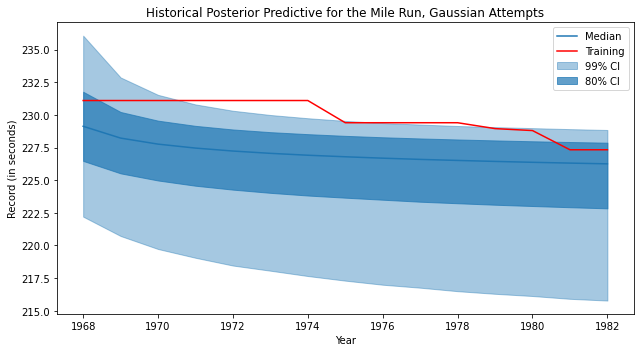

In [58]:
fig = plot_posterior_predictive(model, f"Historical Posterior Predictive for the Mile Run, Gaussian Attempts", figsize=(9,5))
fig.savefig(f"gauss_results/article_gaussian_attempts_post_pred_mile_run.png")

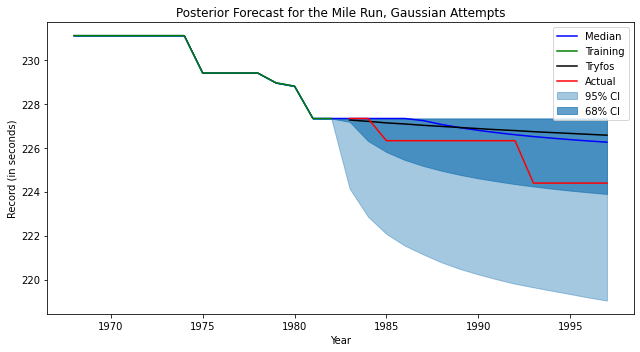

In [59]:
fig = plot_forecast_fin(model, tryfos_fcast, f"Posterior Forecast for the Mile Run, Gaussian Attempts", actual_records, figsize=(9,5))
fig.savefig(f"gauss_results/article_gaussian_attempts_fcast_mile_run.png")

C:\Users\Jonathan\AppData\Local\Temp/ipykernel_225516/1981564619.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


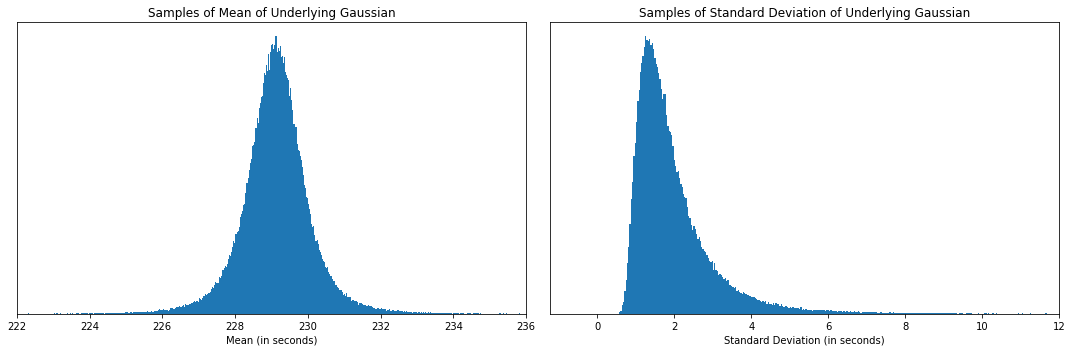

In [80]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].hist(model.trace.posterior.mu.values.flatten(), bins=1000)
axs[0].set_title('Samples of Mean of Underlying Gaussian')
axs[0].set_xlabel('Mean (in seconds)')
axs[0].set_yticks([])
axs[0].set_xlim(222, 236)

axs[1].hist(model.trace.posterior.sigma.values.flatten(), bins=1000)
axs[1].set_title('Samples of Standard Deviation of Underlying Gaussian')
axs[1].set_xlabel('Standard Deviation (in seconds)')
axs[1].set_yticks([])
axs[1].set_xlim(None,12)

fig.tight_layout()

fig.savefig(f"gauss_results/article_gaussian_attempts_posterior_hist.png")

fig.show()

In [82]:
import arviz as az

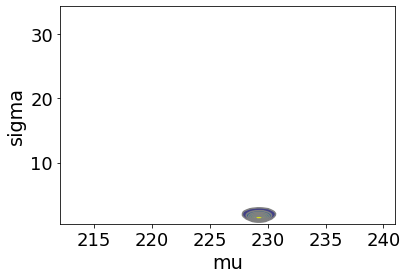

In [88]:
az.plot_pair(model.trace,
            kind='kde',
            var_names=['mu', 'sigma'],
            backend_kwargs
            textsize=18)
    
plt.show()

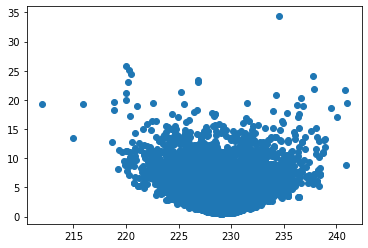

In [81]:
plt.scatter([model.trace.posterior.mu.values.flatten()], model.trace.posterior.sigma.values.flatten())

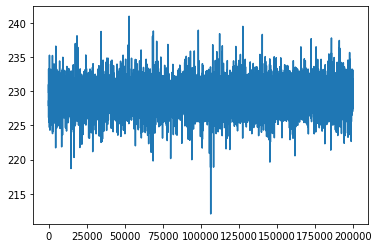

In [73]:
plt.plot(model.trace.posterior.mu.values.flatten())

# Gumbel

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 125 seconds.
The acceptance probability does not match the target. It is 0.9619951504027966, but should be close to 0.99. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


Error: failed on 1000m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 143 seconds.
There were 260 divergences after tuning. Increase `target_accept` or reparameterize.
There were 490 divergences after tuning. Increase `target_accept` or reparameterize.
There were 682 divergences after tuning. Increase `target_accept` or reparameterize.
There were 901 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1123 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1348 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1554 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1775 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1995 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2214 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is s

Error: failed on 1m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 124 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for

Error: failed on 5000m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 218 seconds.
There were 888 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1751 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2752 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3509 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4326 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5189 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5887 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6853 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7644 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8497 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples i

Error: failed on Marathon


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 216 seconds.
There were 1093 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2153 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3120 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4097 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5086 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6098 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7003 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7927 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8836 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9844 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples 

Error: failed on 10000m


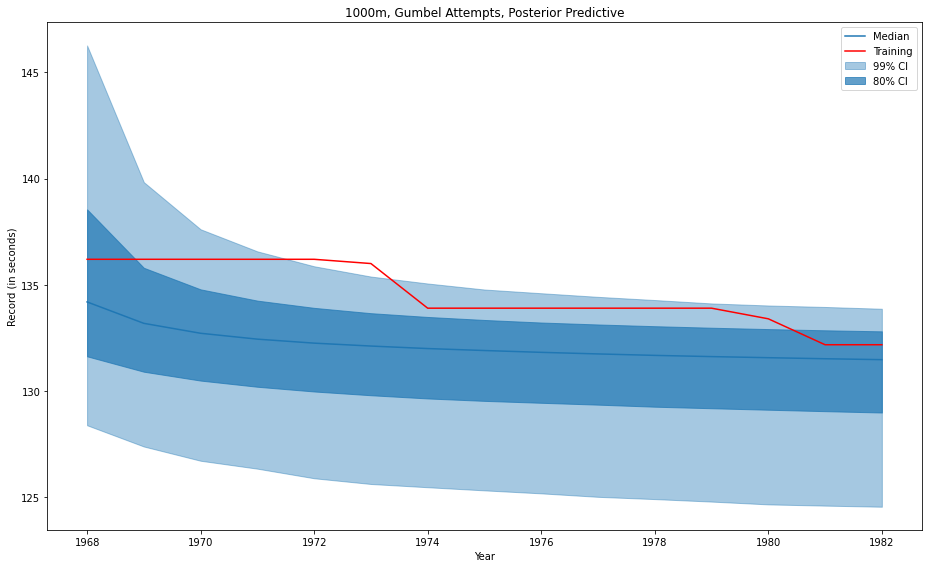

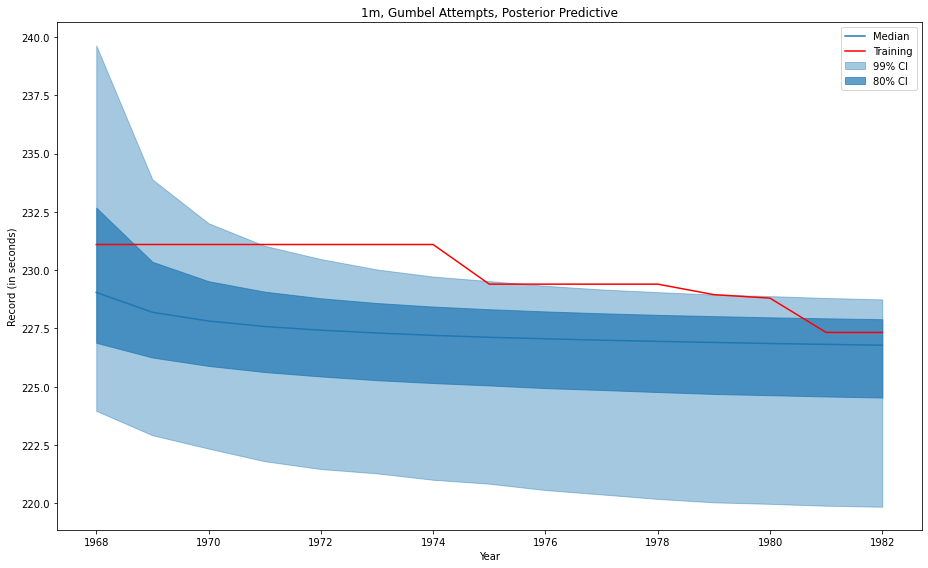

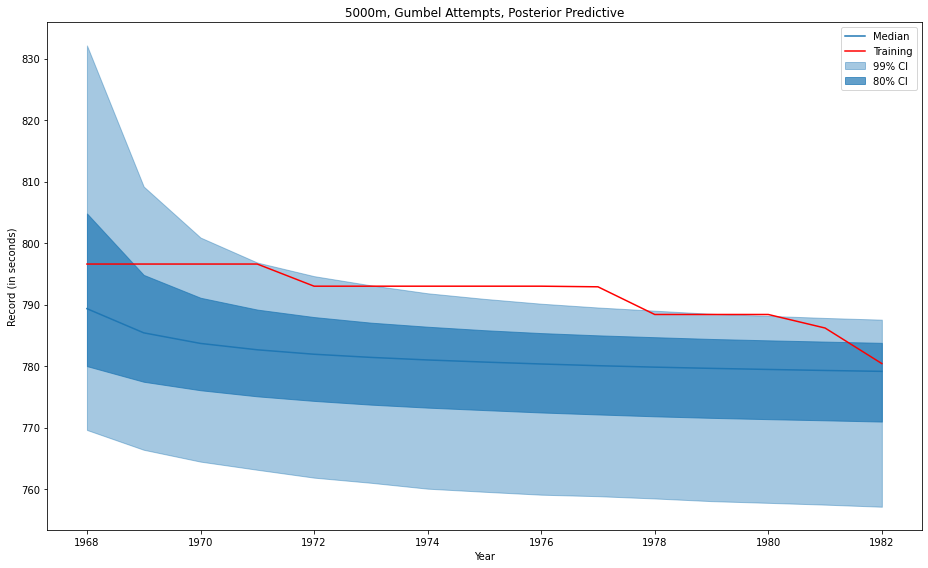

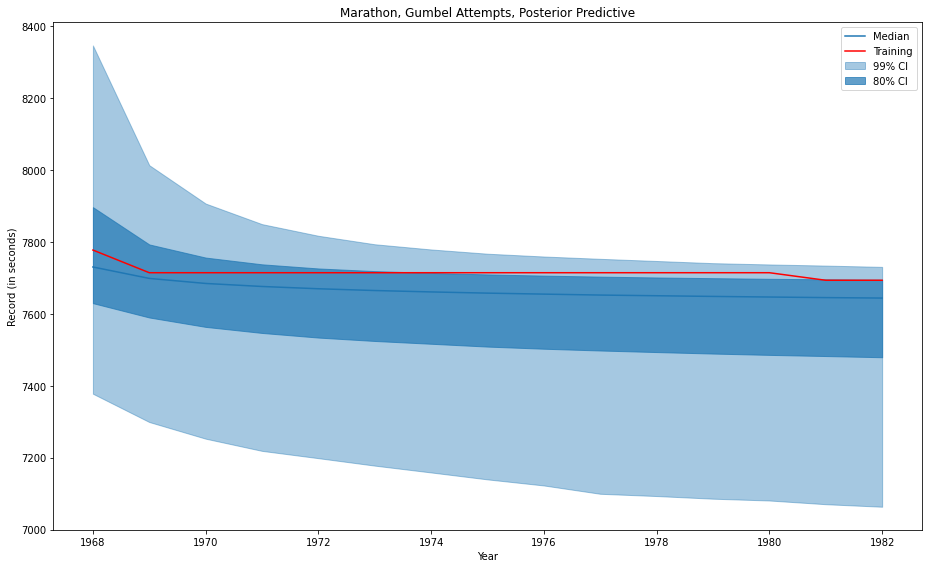

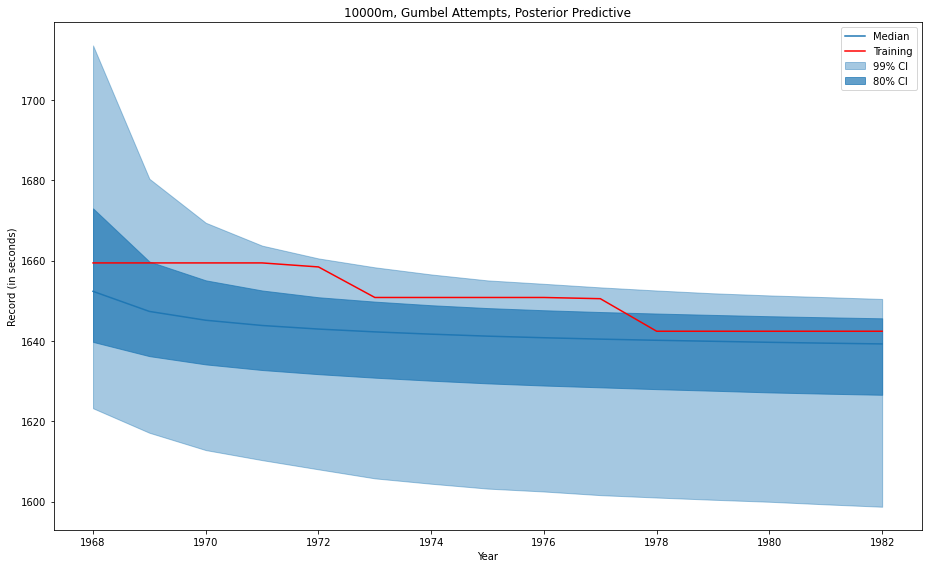

In [ ]:
#whiches = ["1m", "5000m", "10000m", "Marathon"]
whiches = ["1000m", "1m", "5000m", "Marathon", "10000m"]
#whiches = []

mses = {}
avg_log_probs = {}

s5_quantiles = {}
s15_quantiles = {}
s50_quantiles = {}
s85_quantiles = {}
s95_quantiles = {}
means = {}

fails = []

#whiches = ["1000m"]
for which in whiches:

    try:

        df = pd.read_csv("tryfos_data.csv")
        years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

        training_years = years[:15]
        training_records = records[:15]
        tryfos_years = years[15:]
        tryfos_fcast = records[15:]

        actual_df = pd.read_csv("tryfos_actual.csv")
        _, actual_records = actual_df["Year"].values, actual_df[which].values

        prior_parameters = {
                'mu' : {
                    'mean' : training_records[0],
                    'std' : 100*training_records[0],
                },
                'sigma' : {
                    'lam' : 1.0/100.0
                }
            }

        model = fm.ForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gumbel", 
                                    kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
        
        model.fit(chains=10, draws=5000)
        model.posterior_predictive()
        model.forecast()


        # MSE calculation
        median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
        bayes_mse = fm.mse(median, model.fcast_test_data)
        tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
        baseline_fcast = training_records[-1]*np.ones_like(model.fcast_test_data)
        baseline_mse = fm.mse(baseline_fcast, model.fcast_test_data)
        mses[which] = (bayes_mse, tryfos_mse, baseline_mse)

        sample_paths = model.forecast_samples

        s5_quant = np.quantile(sample_paths, q=0.05, axis=0)
        s15_quant = np.quantile(sample_paths, q=0.15, axis=0)
        s50_quant = np.quantile(sample_paths, q=0.5, axis=0)
        s85_quant = np.quantile(sample_paths, q=0.85, axis=0)
        s95_quant = np.quantile(sample_paths, q=0.95, axis=0)
        mean = np.mean(sample_paths, axis=0)

        s5_quantiles[which] = s5_quant
        s15_quantiles[which] = s15_quant
        s50_quantiles[which] = s50_quant
        s85_quantiles[which] = s85_quant
        s95_quantiles[which] = s95_quant
        means[which] = mean


        # Average logp
        avg_log_probs[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])

        # Plots
        fig = plot_posterior_predictive(model, f"{which}, Gumbel Attempts, Posterior Predictive")
        fig.savefig(f"predictions/gumbel/final_{which}_gumbel_attempts_post_pred.png")

        # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gumbel Attempts, Forecast", actual_records)
        # fig.savefig(f"{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"predictions/gumbel/final_{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_fin_w_mean(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"predictions/gumbel/final_{which}_gumbel_attempts_forecast_w_mean.png")

        fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"predictions/gumbel/s_final_{which}_gumbel_attempts_forecast.png")



    except:
       print(f"Error: failed on {which}")
       fails.append(which)

In [ ]:
mses

{'1000m': (0.1544339153686762, 0.30973333333333847, 0.0),
 '1m': (2.4458273978979648, 1.9230733333333596, 3.425253333333406),
 '5000m': (57.20561199364924, 43.3707066666667, 65.49352666666633),
 'Marathon': (1607.8081644432725, 3500.8, 5341.133333333333),
 '10000m': (528.4708865124019, 496.97074666666725, 607.3418133333379)}

In [ ]:
avg_log_probs

{'1000m': -2.298219225159536,
 '1m': -35.28183698772439,
 '5000m': -261.24788473515724,
 'Marathon': -35.04905121751948,
 '10000m': -21894.492624709397}

In [ ]:
print(s5_quantiles)
print(s15_quantiles)
print(s50_quantiles)
print(s85_quantiles)
print(s95_quantiles)
print(means)

{'1000m': array([136.2       , 136.2       , 136.2       , 136.2       ,
       136.2       , 136.        , 133.9       , 133.9       ,
       133.9       , 133.9       , 133.9       , 133.9       ,
       133.4       , 132.18      , 132.18      , 130.7404965 ,
       129.95317183, 129.47328218, 129.15461756, 128.90290376,
       128.70037157, 128.52751713, 128.34894403, 128.23246236,
       128.1212613 , 128.02412826, 127.93967027, 127.88192984,
       127.80929232, 127.73844604]), '1m': array([231.1       , 231.1       , 231.1       , 231.1       ,
       231.1       , 231.1       , 231.1       , 229.4       ,
       229.4       , 229.4       , 229.4       , 228.95      ,
       228.8       , 227.33      , 227.33      , 226.0940153 ,
       225.35585931, 224.94976796, 224.64548252, 224.42081862,
       224.23995539, 224.08726531, 223.93672336, 223.83343765,
       223.74200826, 223.63970749, 223.57060768, 223.48940137,
       223.4199654 , 223.33765088]), '5000m': array([796.6       

# Weibull

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 5_000 tune and 2_000 draw iterations (10_000 + 4_000 draws total) took 23 seconds.
The number of effective samples is smaller than 25% for some parameters.


Error: failed on 1000m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 5_000 tune and 2_000 draw iterations (10_000 + 4_000 draws total) took 38 seconds.


Error: failed on 1m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 5_000 tune and 2_000 draw iterations (10_000 + 4_000 draws total) took 30 seconds.


Error: failed on 5000m


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 5_000 tune and 2_000 draw iterations (10_000 + 4_000 draws total) took 26 seconds.


Error: failed on Marathon


C:\Users\Jonathan\miniconda3\envs\pm3env\lib\site-packages\pymc3\model.py:1755: ImputationWarning: Data in jump_data contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
C:\Users\Jonathan\miniconda3\envs\pm3env\lib\site-packages\pymc3\model.py:1755: ImputationWarning: Data in flat_data contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Error: failed on 10000m


C:\Users\Jonathan\miniconda3\envs\pm3env\lib\site-packages\pymc3\model.py:1755: ImputationWarning: Data in jump_data contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
C:\Users\Jonathan\miniconda3\envs\pm3env\lib\site-packages\pymc3\model.py:1755: ImputationWarning: Data in flat_data contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Error: failed on 20000m


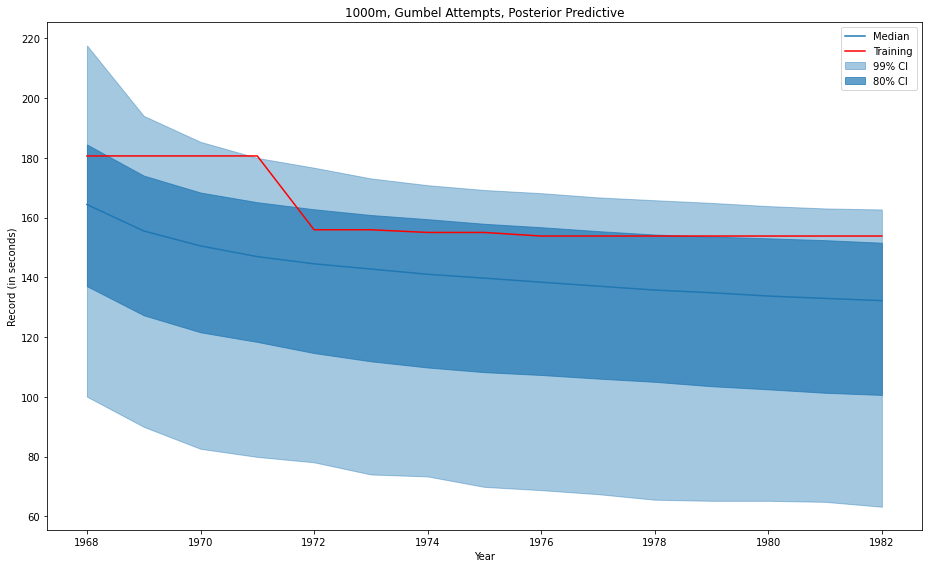

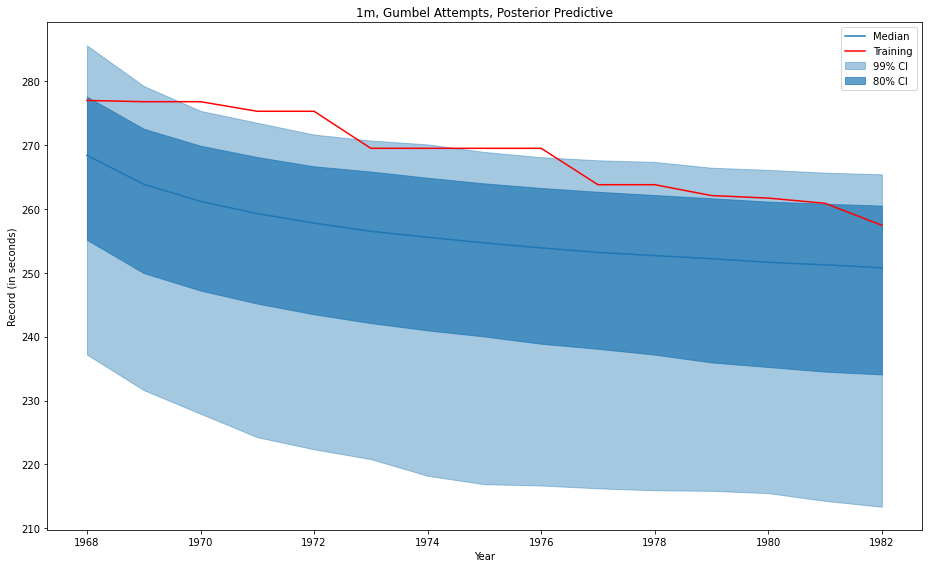

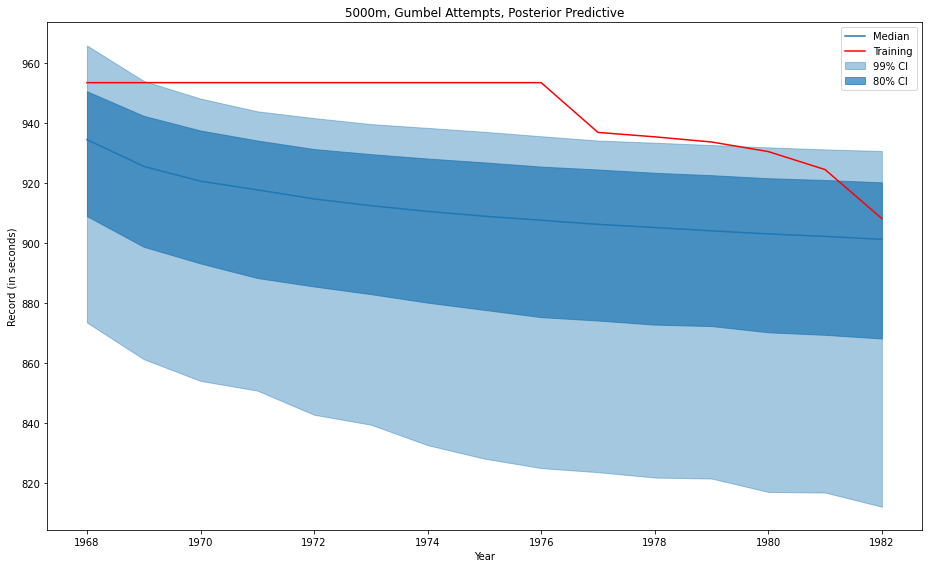

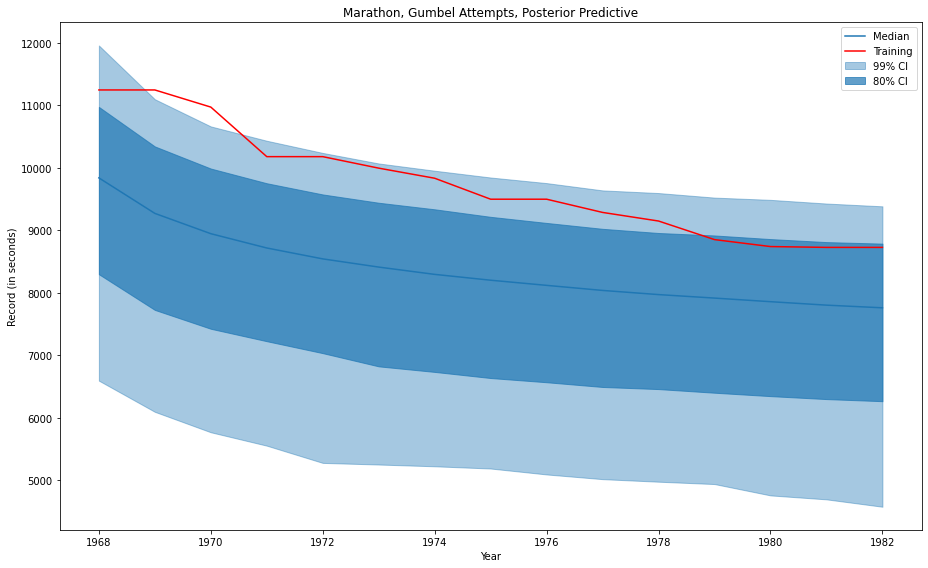

In [7]:
#whiches = ["1m", "5000m", "10000m", "Marathon"]
whiches = ["1000m", "1m", "5000m", "Marathon", "10000m", '20000m']
#whiches = []

msesw = {}
avg_log_probsw = {}

s5_quantiles = {}
s15_quantiles = {}
s50_quantiles = {}
s85_quantiles = {}
s95_quantiles = {}
means = {}

fails = []

#whiches = ["1000m"]
for which in whiches:

    try:

        df = pd.read_csv("tryfos_data_womens.csv")
        years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

        training_years = years[:15]
        training_records = records[:15]
        tryfos_years = years[15:]
        tryfos_fcast = records[15:]

        actual_df = pd.read_csv("tryfos_actual_womens.csv")
        _, actual_records = actual_df["Year"].values, actual_df[which].values

        prior_parameters = {
        'alpha' : {
            'lower' : 1e-5,
            'upper' : 10e4,
        },
        'beta' : {
            'lower' : 1e-5,
            'upper': 10e4,
            }
        }

        model = fm.WeibullForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="weibull", 
                            kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)


        model.fit(chains=2, draws=2000)
        model.posterior_predictive()
        model.forecast()


        # MSE calculation
        median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
        bayes_mse = fm.mse(median, model.fcast_test_data)
        tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
        baseline_fcast = training_records[-1]*np.ones_like(model.fcast_test_data)
        baseline_mse = fm.mse(baseline_fcast, model.fcast_test_data)
        msesw[which] = (bayes_mse, tryfos_mse, baseline_mse)

        # Average logp
        avg_log_probsw[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])


        sample_paths = model.forecast_samples

        s5_quant = np.quantile(sample_paths, q=0.05, axis=0)
        s15_quant = np.quantile(sample_paths, q=0.15, axis=0)
        s50_quant = np.quantile(sample_paths, q=0.5, axis=0)
        s85_quant = np.quantile(sample_paths, q=0.85, axis=0)
        s95_quant = np.quantile(sample_paths, q=0.95, axis=0)
        mean = np.mean(sample_paths, axis=0)

        s5_quantiles[which] = s5_quant
        s15_quantiles[which] = s15_quant
        s50_quantiles[which] = s50_quant
        s85_quantiles[which] = s85_quant
        s95_quantiles[which] = s95_quant
        means[which] = mean


        # Plots
        fig = plot_posterior_predictive(model, f"{which}, Gumbel Attempts, Posterior Predictive")
        fig.savefig(f"womens/weibull/final_{which}_weibull_attempts_post_pred.png")

        # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gumbel Attempts, Forecast", actual_records)
        # fig.savefig(f"{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"womens/predictions/weibull/final_{which}_weibull_attempts_forecast.png")

        fig = plot_forecast_fin_w_mean(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"womens/predictions/weibull/final_{which}_weibull_attempts_forecast_w_mean.png")

        fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"womens/weibull/s_final_{which}_weibull_attempts_forecast.png")



    except:
       print(f"Error: failed on {which}")
       fails.append(which)

In [15]:
msesw

{'1000m': (0.4751277712501471, 0.30973333333333847, 0.0),
 '1m': (1.271411888399154, 1.9230733333333596, 3.425253333333406),
 '5000m': (53.27283603802333, 43.3707066666667, 65.49352666666633),
 'Marathon': (1753.9170060075314, 3500.8, 5341.133333333333),
 '10000m': (540.5166963810487, 496.97074666666725, 607.3418133333379)}

In [16]:
avg_log_probsw

{'1000m': -2.821296028829953,
 '1m': -10.617307578342722,
 '5000m': -35.92279902102185,
 'Marathon': -26.700629980231206,
 '10000m': -77.49709485601977}

In [17]:
print(s5_quantiles)
print(s15_quantiles)
print(s50_quantiles)
print(s85_quantiles)
print(s95_quantiles)

{'1000m': array([136.2       , 136.2       , 136.2       , 136.2       ,
       136.2       , 136.        , 133.9       , 133.9       ,
       133.9       , 133.9       , 133.9       , 133.9       ,
       133.4       , 132.18      , 132.18      , 130.14332011,
       128.68589379, 127.7624618 , 127.149661  , 126.64855027,
       126.22070028, 125.91382171, 125.5914806 , 125.30207914,
       125.08664935, 124.84423666, 124.65946079, 124.4781939 ,
       124.30920643, 124.14200824]), '1m': array([231.1       , 231.1       , 231.1       , 231.1       ,
       231.1       , 231.1       , 231.1       , 229.4       ,
       229.4       , 229.4       , 229.4       , 228.95      ,
       228.8       , 227.33      , 227.33      , 225.21220174,
       224.03912937, 223.27667143, 222.73336424, 222.31537707,
       221.94873191, 221.61202329, 221.35774968, 221.11146339,
       220.89061624, 220.71407402, 220.55339814, 220.39027281,
       220.1924575 , 220.05162113]), '5000m': array([796.6       